In [1]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import librosa
import numpy as np
import random
import requests
import os
from os import listdir
import soundfile as sf #!pip install soundfile
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from tqdm import tqdm_notebook as tqdm
scaler = RobustScaler(with_centering=False)

In [2]:
#upload the data
data = []
for folder in os.listdir('..\EMOLOCK\LibriSpeech\dev-clean'):
    for book in os.listdir('..\EMOLOCK\LibriSpeech\dev-clean/'+folder):
        for file in os.listdir("..\EMOLOCK\LibriSpeech\dev-clean\\"+folder+"/"+book):
            data.append((folder, book, file))

df = pd.DataFrame(data, columns=['folder', "book",'file'])

df["path"]="..\EMOLOCK\LibriSpeech\dev-clean\\"+df["folder"]+"\\"+df["book"]+"\\"+df["file"]

vect=[]
for i in df["path"]:
    try:
        data, samplerate = sf.read(i)
        vect.append(data)
    except:
        vect.append("transcript")
df["audio"]=vect


In [8]:
df=df[df["audio"]!="transcript"]
df.shape

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1069: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


(2703, 5)

In [14]:
#take a subsample of the data, you can use all, but might be slow
inputs=[]
for a in tqdm(df["audio"][0:850]):
    if (len(a)>100000):
        a=np.random.choice(a,size=100000)
    a= scaler.fit_transform(a[:, np.newaxis])
    inputs.append(a.tolist())
    #inputs.append([[el] for el in a.tolist()])
#df["inputs"]=inputs

In [17]:
#we call the deeptone model
url = "http://192.168.9.221:8501/v1/models/model:predict"

#get all the embeddings for the database
pred=[]
for a in tqdm(inputs):
    req=requests.post(url, json={"instances": [a]}).json()
    pred.append(req["predictions"][0])

In [18]:
#compute the average embedding for each audio file
average=[]
for i in tqdm(pred):
    average.append(np.mean(i,axis=0))

In [24]:
df_plot["average"]=average
df_plot["input"]=inputs
df_plot["output"]=pred
df_plot.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,folder,book,file,path,audio,average,input,output
0,1272,128104,1272-128104-0000.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.00238037109375, 0.0020751953125, 0.00198364...","[-0.06768951186494505, -0.04859341779835166, -...","[[0.05782060785767235], [0.050407709414381024]...","[[-0.00262471172, 0.162642062, 0.00233049341, ..."
1,1272,128104,1272-128104-0001.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000152587890625, -9.1552734375e-05, -0.000...","[-0.06736906244733333, -0.045678749160533334, ...","[[-0.0032175032175032173], [-0.001930501930501...","[[0.0157879237, 0.150287509, 0.00835165661, 0...."
2,1272,128104,1272-128104-0002.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.00067138671875, 6.103515625e-05, 0.0005187...","[-0.08279301250618556, -0.019130771689690722, ...","[[0.41964912280701755], [-2.7796491228070175],...","[[-0.0740790591, -0.0674643666, 0.100426979, 0..."
3,1272,128104,1272-128104-0003.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000457763671875, -0.000396728515625, -0.00...","[-0.07028685399896903, -0.018000207195195874, ...","[[-1.8511326860841424], [-0.30097087378640774]...","[[-0.0935928822, 0.0524962209, 0.0759180859, 0..."
4,1272,128104,1272-128104-0004.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.000213623046875, -0.00054931640625, 6.10351...","[-0.07209065978659794, -0.02108616281580412, 0...","[[-2.66875], [-0.019642857142857142], [-0.1401...","[[-0.0884875655, 0.0442366265, 0.0930714, 0.03..."


In [25]:
# save the databae
df_plot.to_csv("audio_book")
df_plot[]
df_plot["average"]=average

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_plot.head()

,folder,book,file,path,audio,average
0,1272,128104,1272-128104-0000.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.00238037109375, 0.0020751953125, 0.00198364...","[-0.06768951186494505, -0.04859341779835166, -..."
1,1272,128104,1272-128104-0001.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000152587890625, -9.1552734375e-05, -0.000...","[-0.06736906244733333, -0.045678749160533334, ..."
2,1272,128104,1272-128104-0002.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.00067138671875, 6.103515625e-05, 0.0005187...","[-0.05867731203656412, -0.04640335718194872, -..."
3,1272,128104,1272-128104-0003.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000457763671875, -0.000396728515625, -0.00...","[-0.06651699120667534, -0.05553665817220778, -..."
4,1272,128104,1272-128104-0004.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.000213623046875, -0.00054931640625, 6.10351...","[-0.06025613287270586, -0.0465054395817026, -0..."


In [43]:
X=df_plot["average"]
X = np.matrix(X.tolist())

In [45]:
#we choose TSNE to plot some results
X_tsne = TSNE(n_components=2,perplexity=5).fit_transform(X)

In [55]:
df_X=pd.DataFrame(data=X_tsne,columns=["component_1","component_2"])

In [57]:
graph=pd.concat([df_plot, df_X.reindex(df_plot.index)], axis=1)

In [58]:
graph.head()

,folder,book,file,path,audio,average,component_1,component_2
0,1272,128104,1272-128104-0000.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.00238037109375, 0.0020751953125, 0.00198364...","[-0.06768951186494505, -0.04859341779835166, -...",87.649124,75.686768
1,1272,128104,1272-128104-0001.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000152587890625, -9.1552734375e-05, -0.000...","[-0.06736906244733333, -0.045678749160533334, ...",76.264297,52.362850
2,1272,128104,1272-128104-0002.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.00067138671875, 6.103515625e-05, 0.0005187...","[-0.05867731203656412, -0.04640335718194872, -...",74.460884,45.951069
3,1272,128104,1272-128104-0003.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[-0.000457763671875, -0.000396728515625, -0.00...","[-0.06651699120667534, -0.05553665817220778, -...",82.513435,75.048874
4,1272,128104,1272-128104-0004.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,"[0.000213623046875, -0.00054931640625, 6.10351...","[-0.06025613287270586, -0.0465054395817026, -0...",82.557213,49.478905


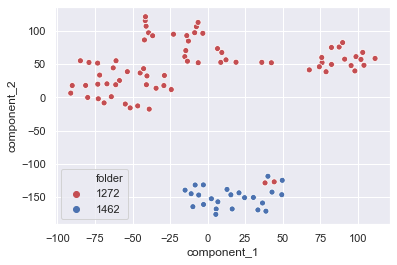

In [76]:
#graph some results with TSNE just 2 speakers
ax = sns.scatterplot(x="component_1", y="component_2", hue="folder", palette=["r","b"],data=graph)

In [3]:
complete=pd.read_csv("audio_book")

In [76]:
mean=[]
for j in range(len(complete)):
    lst=[float(complete["average"][j].strip("[]").split()[i]) for i in range(128)]
    mean.append(lst)
mean[0:2]

[[-0.06768951,
  -0.04859342,
  -0.02190837,
  -0.01399378,
  -0.00918964,
  -0.02027732,
  0.02362813,
  -0.0276954,
  -0.01707022,
  -0.01220598,
  -0.06020352,
  -0.0033937,
  -0.05497588,
  0.10838095,
  -0.00638881,
  -0.00938561,
  -0.00488112,
  -0.01939696,
  -0.0532261,
  -0.04518221,
  -0.09015656,
  -0.0124203,
  -0.02153464,
  0.00453994,
  -0.0189654,
  -0.02275801,
  -0.00633857,
  0.19938192,
  0.05564684,
  -0.10379489,
  -0.06330993,
  -0.07646991,
  0.13333549,
  -0.02792118,
  -0.03381153,
  0.27004683,
  -0.0517087,
  -0.02109121,
  0.02581748,
  0.0165687,
  -0.06937741,
  -0.03428034,
  0.16491536,
  0.08850933,
  -0.00935704,
  0.17728606,
  -0.01221013,
  0.02098879,
  0.07308687,
  0.02376039,
  -0.01259655,
  -0.0079483,
  0.07656007,
  -0.0042023,
  0.22302783,
  -0.10198465,
  0.13751408,
  -0.0331125,
  -0.05014375,
  -0.08320937,
  -0.01365879,
  0.04656888,
  -0.01244124,
  0.05123371,
  -0.09600917,
  0.0427001,
  -0.04594522,
  0.00852756,
  0.24058973,

In [83]:
complete["mean"]=mean

In [90]:
complete["folder"].unique()

array([1272, 1462, 1673,  174, 1919, 1988, 1993, 2035, 2078, 2086, 2277,
       2412, 2428], dtype=int64)

In [121]:
X=complete["mean"]
X = np.matrix(X.tolist())
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2,perplexity=10).fit_transform(X)

In [122]:
df_X_comp=pd.DataFrame(data=X_tsne,columns=["component_1","component_2"])
graph=pd.concat([complete, df_X_comp.reindex(complete.index)], axis=1)
graph.head()

,Unnamed: 0,folder,book,file,path,audio,average,input,output,mean,component_1,component_2
0,0,1272,128104,1272-128104-0000.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,[0.00238037 0.0020752 0.00198364 ... 0.000427...,[-0.06768951 -0.04859342 -0.02190837 -0.013993...,"[[0.05782060785767235], [0.050407709414381024]...","[[-0.00262471172, 0.162642062, 0.00233049341, ...","[-0.06768951, -0.04859342, -0.02190837, -0.013...",52.547638,-23.818153
1,1,1272,128104,1272-128104-0001.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,[-1.52587891e-04 -9.15527344e-05 -1.83105469e-...,[-0.06736906 -0.04567875 -0.02280784 -0.024242...,"[[-0.0032175032175032173], [-0.001930501930501...","[[0.0157879237, 0.150287509, 0.00835165661, 0....","[-0.06736906, -0.04567875, -0.02280784, -0.024...",51.759621,-24.072178
2,2,1272,128104,1272-128104-0002.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,[-6.71386719e-04 6.10351562e-05 5.18798828e-...,[-8.27930125e-02 -1.91307717e-02 6.56373976e-...,"[[0.41964912280701755], [-2.7796491228070175],...","[[-0.0740790591, -0.0674643666, 0.100426979, 0...","[-0.0827930125, -0.0191307717, 0.0656373976, 0...",20.289080,4.751822
3,3,1272,128104,1272-128104-0003.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,[-0.00045776 -0.00039673 -0.00048828 ... -0.00...,[-0.07028685 -0.01800021 0.09354929 0.019940...,"[[-1.8511326860841424], [-0.30097087378640774]...","[[-0.0935928822, 0.0524962209, 0.0759180859, 0...","[-0.07028685, -0.01800021, 0.09354929, 0.01994...",-11.170935,17.434881
4,4,1272,128104,1272-128104-0004.flac,..\EMOLOCK\LibriSpeech\dev-clean\1272\128104\1...,[ 2.13623047e-04 -5.49316406e-04 6.10351562e-...,[-0.07209066 -0.02108616 0.09040565 0.015703...,"[[-2.66875], [-0.019642857142857142], [-0.1401...","[[-0.0884875655, 0.0442366265, 0.0930714, 0.03...","[-0.07209066, -0.02108616, 0.09040565, 0.01570...",12.482890,20.227411


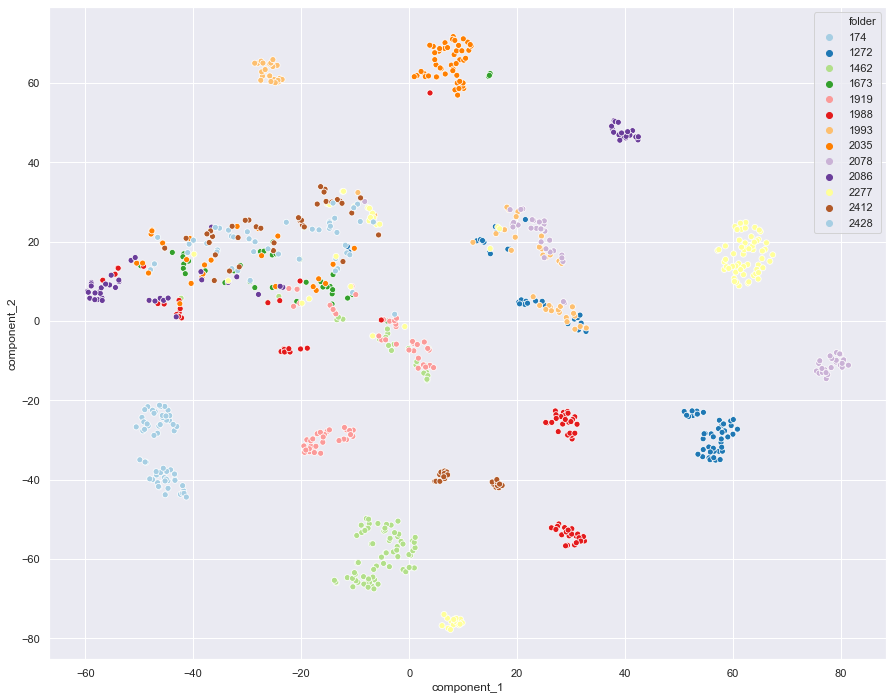

In [123]:
#results with multiple speakers
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.scatterplot(x="component_1", y="component_2", hue="folder", palette=sns.color_palette("Paired", n_colors=13), data=graph)#, palette=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)],data=graph)